In [1]:
import pandas as pd
import plotly as pt
import os
import jsonlines
import re
import plotly.express as px
from quantulum3 import parser

In [3]:
def read_data(filename):
    ''' Reads a jsonl file
    :param filename: file to be read
    :return: list of NLI samples
    '''
    dev_data = []
    with jsonlines.open(filename) as reader:
        for obj in reader:
            dev_data.append(obj)
    assert len(dev_data) > 0
    return dev_data

def convert_list_to_df(sample_list):
    return pd.DataFrame([{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in sample_list])

In [4]:
root_path = os.path.dirname(os.getcwd())
data_path = os.path.join(root_path, "data", "equate")
datasets = ["AWPNLI.jsonl", "NewsNLI.jsonl", "RedditNLI.jsonl", "RTE_Quant.jsonl", "StressTest.jsonl"]
datasets = [os.path.join(data_path, dataset) for dataset in datasets]

awp = read_data(datasets[0])
news = read_data(datasets[1])
reddit = read_data(datasets[2])
rte = read_data(datasets[3])
stress = read_data(datasets[4])

In [5]:
print(len(awp), len(news), len(reddit), len(rte), len(stress))

722 968 250 166 7596


In [16]:
type(awp[0])

dict

In [17]:
awp[0].keys()

dict_keys(['sentence2_tokens', 'sentence1_dep_parse', 'sentence1_binary_parse', 'sentence2_binary_parse', 'sentence1_syntax_parse', 'sentence1', 'sentence2', 'sentence2_syntax_parse', 'sentence2_pos', 'sentence2_dep_parse', 'gold_label', 'sentence1_pos', 'sentence1_tokens'])

In [6]:
# extract only s1, s2 and label
awp_subset = [{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in awp]
news_subset = [{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in news]
reddit_subset = [{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in reddit]
rte_subset = [{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in rte]
stress_subset = [{key: example[key] for key in ['sentence1', 'sentence2', 'gold_label']} for example in stress]

In [7]:
print(len(awp_subset), len(news_subset), len(reddit_subset), len(rte_subset), len(stress_subset))

722 968 250 166 7596


In [8]:
awp_df = pd.DataFrame(awp_subset)
news_df = pd.DataFrame(news_subset)
reddit_df = pd.DataFrame(reddit_subset)
rte_df = pd.DataFrame(rte_subset)
stress_df = pd.DataFrame(stress_subset)

UTIL FUNCTIONS

In [21]:
def remove_double_and_trailing_spaces(df, column_name):
    df[column_name] = df[column_name].apply(lambda str_value: re.sub(' +', ' ', str_value).strip())

In [22]:
def count_words_in_string(df, column_name):
    df[f"{column_name}_word_cnt"] = df[column_name].apply(lambda str_value: len(str_value.split(" ")))

In [23]:
def count_chars_in_string(df, column_name):
    df[f"{column_name}_char_cnt"] = df[column_name].apply(lambda str_value: len(str_value))

In [24]:
def inspect_dataset(dataset_df):
    remove_double_and_trailing_spaces(dataset_df, "sentence1")
    remove_double_and_trailing_spaces(dataset_df, "sentence2")
    count_words_in_string(dataset_df, "sentence1")
    count_words_in_string(dataset_df, "sentence2")
    count_chars_in_string(dataset_df, "sentence1")
    count_chars_in_string(dataset_df, "sentence2")

## AWP dataset

In [25]:
awp_df.head()

,sentence1,sentence2,gold_label
0,Sam had 9.0 dimes in his bank and his dad gav...,Sam has 16.0 dimes now,entailment
1,Sam had 9.0 dimes in his bank and his dad gav...,Sam has 17.0 dimes now,contradiction
2,A restaurant served 9.0 pizzas during lunch an...,15.0 pizzas were served today,entailment
3,A restaurant served 9.0 pizzas during lunch an...,17.0 pizzas were served today,contradiction
4,There are 2.0 pencils in the drawer and Tim p...,5.0 pencils are now there in total,entailment


In [8]:
awp_df['gold_label'].value_counts()

gold_label
entailment       361
contradiction    361
Name: count, dtype: int64

In [27]:
inspect_dataset(awp_df)

awp_df.head()

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
0,Sam had 9.0 dimes in his bank and his dad gave...,Sam has 16.0 dimes now,entailment,14,5,60,22
1,Sam had 9.0 dimes in his bank and his dad gave...,Sam has 17.0 dimes now,contradiction,14,5,60,22
2,A restaurant served 9.0 pizzas during lunch an...,15.0 pizzas were served today,entailment,13,5,73,29
3,A restaurant served 9.0 pizzas during lunch an...,17.0 pizzas were served today,contradiction,13,5,73,29
4,There are 2.0 pencils in the drawer and Tim pl...,5.0 pencils are now there in total,entailment,15,7,76,34


In [28]:
awp_df[["sentence1_word_cnt", "sentence1_char_cnt", "sentence2_word_cnt", "sentence2_char_cnt"]].mean()

sentence1_word_cnt    16.236842
sentence1_char_cnt    84.925208
sentence2_word_cnt     6.450139
sentence2_char_cnt    33.279778
dtype: float64

## News dataset

In [9]:
news_df.head()

,sentence1,sentence2,gold_label
0,Lepore said he was moved to photograph the slu...,Joey Lepore says he took photos of one guard s...,entailment
1,"Sharper , 38 , faces rape charges in Arizona a...",Darren Sharper has been charged in two states ...,entailment
2,I am the single mother of three sons -- grown ...,Weldon says she 's a single mom of three flour...,entailment
3,"In addition to 79 fatalities , some 170 passen...",The crash took the lives of 79 people and inju...,entailment
4,Treacherous currents took at least four lives ...,"Rip currents kill four in Alabama , close beac...",entailment


In [10]:
news_df['gold_label'].value_counts()

gold_label
entailment    491
neutral       477
Name: count, dtype: int64

In [12]:
491/(491+477)

0.5072314049586777

In [11]:
news_df[news_df['gold_label'] == 'neutral'].head(30).to_excel("NewsNLI_neutral_samples.xlsx")

In [31]:
inspect_dataset(news_df)

news_df.head()

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
0,Lepore said he was moved to photograph the slu...,Joey Lepore says he took photos of one guard s...,entailment,20,14,123,73
1,"Sharper , 38 , faces rape charges in Arizona a...",Darren Sharper has been charged in two states ...,entailment,22,13,114,76
2,I am the single mother of three sons -- grown ...,Weldon says she 's a single mom of three flour...,entailment,17,16,78,85
3,"In addition to 79 fatalities , some 170 passen...",The crash took the lives of 79 people and inju...,entailment,12,12,65,58
4,Treacherous currents took at least four lives ...,"Rip currents kill four in Alabama , close beac...",entailment,23,11,128,60


In [32]:
news_df[["sentence1_word_cnt", "sentence1_char_cnt", "sentence2_word_cnt", "sentence2_char_cnt"]].mean()

sentence1_word_cnt     22.330579
sentence1_char_cnt    120.600207
sentence2_word_cnt     11.984504
sentence2_char_cnt     66.581612
dtype: float64

## Reddit dataset

In [33]:
reddit_df.head()

,sentence1,sentence2,gold_label
0,stocks nifty future call today: Sensex Weak an...,"Sensex and Nifty up, 2 sept Nifty stock market...",contradiction
1,"At DAVOS, Financial Billionaire Schwartzman, w...","At Davos, Wall Street Billionaire Steven Schwa...",neutral
2,"SENSEX Nifty up, Today stocks nifty future tra...","Sensex down 74.58 points, Nifty future tips, T...",contradiction
3,"At DAVOS, Financial Billionaire Schwartzman, w...","At Davos, Wall Street Billionaire Mr Schwartzf...",entailment
4,"Sensex and Nifty up, 2 sept Nifty stock market...",stocks nifty future call today: Sensex Weak an...,contradiction


In [14]:
146/(146+19)

0.8848484848484849

In [34]:
reddit_df['gold_label'].value_counts()

gold_label
entailment       146
neutral           85
contradiction     19
Name: count, dtype: int64

In [187]:
inspect_dataset(reddit_df)

reddit_df.head(10)

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
0,stocks nifty future call today: Sensex Weak an...,"Sensex and Nifty up, 2 sept Nifty stock market...",contradiction,28,30,153,167
1,"At DAVOS, Financial Billionaire Schwartzman, w...","At Davos, Wall Street Billionaire Steven Schwa...",neutral,22,24,146,160
2,"SENSEX Nifty up, Today stocks nifty future tra...","Sensex down 74.58 points, Nifty future tips, T...",contradiction,27,26,153,158
3,"At DAVOS, Financial Billionaire Schwartzman, w...","At Davos, Wall Street Billionaire Mr Schwartzf...",entailment,22,24,146,154
4,"Sensex and Nifty up, 2 sept Nifty stock market...",stocks nifty future call today: Sensex Weak an...,contradiction,30,28,167,153
5,"Indian Rupee down, Tomorrow On Monday stock ni...","SENSEX Nifty up, Today stocks nifty future tra...",neutral,24,27,141,153
6,The US is quickly becoming a 3rd world country...,Never forget the USA is the best in everything...,entailment,23,27,128,152
7,"At DAVOS, Financial Billionaire Schwartzman, w...","At Davos, Wall Street Billionaire Schwartzfman...",entailment,22,23,146,151
8,"At Davos, Wall Street Billionaire Steven Schwa...","At DAVOS, Financial Billionaire Schwartzman, w...",entailment,24,22,160,146
9,"At Davos, Wall Street Billionaire Mr Schwartzf...","At DAVOS, Financial Billionaire Schwartzman, w...",neutral,24,22,154,146


In [36]:
reddit_df[["sentence1_word_cnt", "sentence1_char_cnt", "sentence2_word_cnt", "sentence2_char_cnt"]].mean()

sentence1_word_cnt    11.960
sentence1_char_cnt    69.456
sentence2_word_cnt    11.460
sentence2_char_cnt    65.660
dtype: float64

## RTE dataset

In [37]:
rte_df.head()

,sentence1,sentence2,gold_label
0,In 1956 Accardo won the Geneva Competition and...,Accardo composed 24 Caprices .,neutral
1,David Golinkin is the editor or author of eigh...,Golinkin has written eighteen books .,neutral
2,David Golinkin is single-handedly responsible ...,David Golinkin is the author of dozen of respo...,neutral
3,During Reinsdorf 's 24 seasons as chairman of ...,Reinsdorf was the chairman of the White Sox fo...,entailment
4,During Reinsdorf 's 24 seasons as chairman of ...,The White Sox have won 24 championships .,neutral


In [38]:
rte_df['gold_label'].value_counts()

gold_label
neutral       96
entailment    70
Name: count, dtype: int64

In [15]:
rte_df[rte_df["gold_label"] == "neutral"].head(30).to_excel("RTE_neutral_samples.xlsx")

In [39]:
inspect_dataset(rte_df)

rte_df.head()

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
0,In 1956 Accardo won the Geneva Competition and...,Accardo composed 24 Caprices .,neutral,52,5,281,30
1,David Golinkin is the editor or author of eigh...,Golinkin has written eighteen books .,neutral,22,6,113,37
2,David Golinkin is single-handedly responsible ...,David Golinkin is the author of dozen of respo...,neutral,37,22,239,123
3,During Reinsdorf 's 24 seasons as chairman of ...,Reinsdorf was the chairman of the White Sox fo...,entailment,31,12,176,60
4,During Reinsdorf 's 24 seasons as chairman of ...,The White Sox have won 24 championships .,neutral,31,8,176,41


In [40]:
rte_df[["sentence1_word_cnt", "sentence1_char_cnt", "sentence2_word_cnt", "sentence2_char_cnt"]].mean()

sentence1_word_cnt     32.138554
sentence1_char_cnt    176.753012
sentence2_word_cnt     11.590361
sentence2_char_cnt     61.246988
dtype: float64

## Stress dataset

In [41]:
stress_df.head()

,sentence1,sentence2,gold_label
0,If Joe goes with her 6 years old twin brothers...,If Joe goes with her more than 1 years old twi...,entailment
1,If Joe goes with her more than 1 years old twi...,If Joe goes with her 6 years old twin brothers...,neutral
2,If Joe goes with her 6 years old twin brothers...,If Joe goes with her less than 6 years old twi...,contradiction
3,"Tim has 350 pounds of cement in 100 , 50 , and...",Tim has less than 750 pounds of cement in 100 ...,entailment
4,Tim has less than 750 pounds of cement in 100 ...,"Tim has 350 pounds of cement in 100 , 50 , and...",neutral


In [42]:
stress_df['gold_label'].value_counts()

gold_label
entailment       2532
neutral          2532
contradiction    2532
Name: count, dtype: int64

In [43]:
inspect_dataset(stress_df)

stress_df.head()

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
0,If Joe goes with her 6 years old twin brothers...,If Joe goes with her more than 1 years old twi...,entailment,19,21,84,94
1,If Joe goes with her more than 1 years old twi...,If Joe goes with her 6 years old twin brothers...,neutral,21,19,94,84
2,If Joe goes with her 6 years old twin brothers...,If Joe goes with her less than 6 years old twi...,contradiction,19,21,84,94
3,"Tim has 350 pounds of cement in 100 , 50 , and...",Tim has less than 750 pounds of cement in 100 ...,entailment,15,17,60,70
4,Tim has less than 750 pounds of cement in 100 ...,"Tim has 350 pounds of cement in 100 , 50 , and...",neutral,17,15,70,60


In [44]:
stress_df[["sentence1_word_cnt", "sentence1_char_cnt", "sentence2_word_cnt", "sentence2_char_cnt"]].mean()

sentence1_word_cnt    20.905082
sentence1_char_cnt    95.779753
sentence2_word_cnt    21.247367
sentence2_char_cnt    97.442206
dtype: float64

## Potential EDA questions

<ul>
    <li>Word cloud for each dataset</li>
    <li>Extract numbers and inspect ranges, distribution</li>
    <li>Labels distributions</li>
    <li>Verbs used and operations they imply: https://stackoverflow.com/questions/47856247/extract-verb-phrases-using-spacy</li>
</ul>

In [45]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [55]:
def generate_word_cloud(text):
    wordcloud = WordCloud(stopwords=STOPWORDS,
    background_color='white',
    collocations=False,
    max_words=20).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

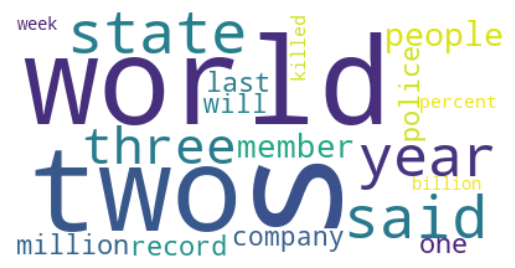

In [334]:
premise_list = list(rte_df["sentence1"].values)
hypothesis_list = list(rte_df["sentence2"].values)
premise, hypothesis = " ".join(premise_list), " ".join(hypothesis_list)
# Create and generate a word cloud image:
generate_word_cloud(premise)

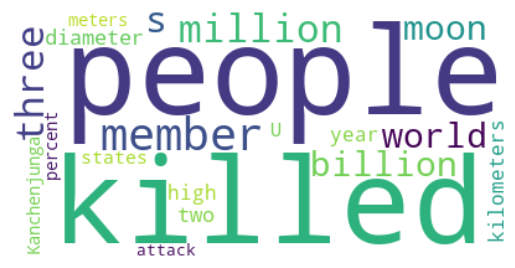

In [335]:
generate_word_cloud(hypothesis)

In [336]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_verbs_from_text(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    verbs = list(map(lambda x: x[0], filter(lambda word: 'VB' in word[1], tagged_tokens)))
    return verbs

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ioanamazilu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ioanamazilu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [337]:
verbs_premise, verbs_hypothesis = extract_verbs_from_text(premise), extract_verbs_from_text(hypothesis)

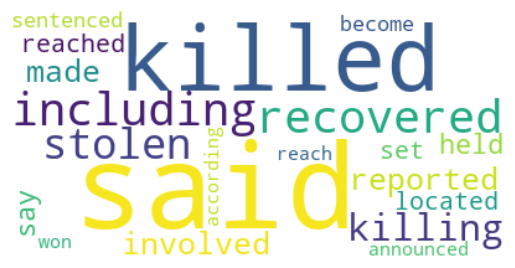

In [338]:
generate_word_cloud(" ".join(verbs_premise))

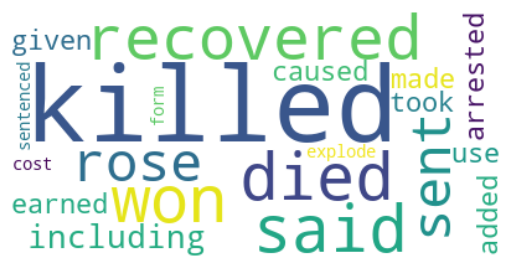

In [339]:
generate_word_cloud(" ".join(verbs_hypothesis))

In [340]:
parser.parse("This is a text that contains 2 quantities. Eight is also a quantity. One apple and forty three bananas. I gave you 1 apple. The apple weights 230.45 grams. Two apples weight more. Also one and a half is a number")

[Quantity(2, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)"),
 Quantity(8, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)"),
 Quantity(43, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)"),
 Quantity(1, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)"),
 Quantity(230.45, "Unit(name="gram", entity=Entity("mass"), uri=Gram)"),
 Quantity(2, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)"),
 Quantity(1.5, "Unit(name="dimensionless", entity=Entity("dimensionless"), uri=Dimensionless_quantity)")]

In [341]:
a = [2, 3]
a.extend([])
a

[2, 3]

In [342]:
def extract_quantities_from_texts(texts):
    quantities = []
    expr = re.compile('[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?', re.VERBOSE)
    for text in texts:
        quant_regex = expr.findall(text)
        one_count = text.lower().count(" one ") # add spaces so we don't count `one` as part of a word
        ones_list = [1.0] * one_count if one_count != 0 else []
        quantities.extend(ones_list)
        try:
            extracted_quantities = parser.parse(text)
            quantities.extend([quantity.value for quantity in extracted_quantities])
        except:
            quantities.extend(quant_regex)
    return quantities

def bin_quantities_by_magnitude(quantities):
    magnitude_counts = dict()
    for quantity in quantities:
        quantity = str(quantity).split(".")[0]  # remove decimal points
        if len(quantity) == 0:
            print(quantity)
        magnitude_count = magnitude_counts.get(len(quantity), 0)
        magnitude_count += 1
        magnitude_counts[len(quantity)] = magnitude_count
    return magnitude_counts

def analyse_quantity_magnitudes_in_text(texts):
    quantities = extract_quantities_from_texts(texts)
    binned_quantities = bin_quantities_by_magnitude(quantities)
    binned_quantities_df = pd.DataFrame({"magnitude": binned_quantities.keys(), "count": binned_quantities.values()})
    fig = px.histogram(binned_quantities_df, y="count", x="magnitude", nbins=16)
    fig.show()
    return binned_quantities_df

In [343]:
analyse_quantity_magnitudes_in_text(premise_list)

,magnitude,count
0,4,53
1,2,97
2,1,116
3,3,25
4,10,5
5,8,3
6,6,9
7,5,8
8,7,5
9,13,2


In [344]:
analyse_quantity_magnitudes_in_text(hypothesis_list)

,magnitude,count
0,2,56
1,3,16
2,1,58
3,4,30
4,10,5
5,8,3
6,6,10
7,11,3
8,7,2
9,5,6


In [321]:
quantifiers = ["at least", "not less than", "no less than", "minimum of", "equal to or greater than", "no fewer than", "not fewer than", "not below", "at most", "no more than", "not more than", "more than", "maximum of", "equal to or less than", "no greater than", "not above", "less than or equal to", "not exceeding", "up to",
"greater than or equal to", "not fewer than", "down to", "less than", "below", "under", "lower than", "above", "over", "greater than", "as high as", "as little as", "exceeding", "around", "approximately", "roughly", "about", "near", "close to"]

# quantifiers = {
#     "at least": ["at least", "not less than", "minimum of", "equal to or greater than", "no fewer than", "not below"],
#     "at most": ["at most", "no more than", "maximum of", "equal to or less than", "no greater than", "not above"],
#     "no more than": ["no more than", "at most", "maximum of", "less than or equal to", "not exceeding", "up to"],
#     "no less than": ["no less than", "at least", "minimum of", "not below", "equal to or greater than", "not fewer than"],
#     "less than": ["less than", "below", "under", "lower than", "inferior to", "beneath"],
#     "more than": ["more than", "above", "over", "greater than", "superior to", "beyond"],
#     "as high as": ["as high as", "equal to or as high as", "up to", "reaching", "matching", "climbing to"],
#     "as little as": ["as little as", "equal to or as little as", "down to", "at a minimum of", "no more than", "only"],
#     "above": ["above", "beyond", "higher than", "over", "exceeding", "upwards of"],
#     "below": ["below", "under", "beneath", "less than", "lower than", "inferior to"],
#     "around": ["around", "approximately", "roughly", "about", "near", "close to"],
#     "approximately": ["approximately", "around", "roughly", "about", "nearly", "close to"]
# }

def count_lookup_phrases(sentences):
    total_cnt, premise_count = 0, 0
    phrases_found = set()
    for phrase in quantifiers:
        for premise in sentences:
            premise_counted = False
            if phrase in premise:
                phrases_found.add(phrase)
                total_cnt += 1
                if not premise_counted:
                    premise_count += 1
    return total_cnt, premise_count, phrases_found

print(count_lookup_phrases(list(awp_df["sentence1"].values)))

(18, 18, {'around', 'about', 'over', 'up to'})


In [322]:
awp_df[awp_df["sentence1"].str.contains("around")]

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
342,Christian’s father and the senior ranger gathe...,They were able to fill 4.0 sacks if they gathe...,entailment,32,14,185,69
343,Christian’s father and the senior ranger gathe...,They were able to fill 6.0 sacks if they gathe...,contradiction,32,14,185,69
712,Christian’s father and the senior ranger gathe...,They were able to gather 1600.0 pieces of fire...,entailment,32,14,185,78
713,Christian’s father and the senior ranger gathe...,They were able to gather 1604.0 pieces of fire...,contradiction,32,14,185,78


In [323]:
print(count_lookup_phrases(list(awp_df["sentence2"].values)))

(8, 8, {'over'})


In [324]:
print(count_lookup_phrases(list(reddit_df["sentence1"].values)))

(41, 41, {'near', 'below', 'at least', 'around', 'down to', 'more than', 'above', 'about', 'under', 'close to', 'over', 'exceeding'})


In [325]:
reddit_df[reddit_df["sentence1"].str.contains("around")]

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
8,"At Davos, Wall Street Billionaire Steven Schwa...","At DAVOS, Financial Billionaire Schwartzman, w...",entailment,24,22,160,146


In [326]:
reddit_df[reddit_df["sentence1"].str.contains("above")]

,sentence1,sentence2,gold_label,sentence1_word_cnt,sentence2_word_cnt,sentence1_char_cnt,sentence2_char_cnt
12,"Sensex closed up 204.96 points, Nifty above 54...","Indian Rupee down, Tomorrow On Monday stock ni...",neutral,22,24,138,141
19,"Sensex high 20000 touch, Nifty above 5900, Tue...","SENSEX & Nifty down, Sensex down 357.39 Pts, N...",contradiction,19,21,116,132
89,"Sensex rises 103 points, Nifty ends above 8,90...","Sensex rises 100 pts, Nifty ends above 8900, S...",contradiction,12,11,76,64
182,Dow closes above 18000 for first time in 9 months,Dow Closes Above 18K for First Time Since July,entailment,10,9,49,46
249,"Nifty traded above 7500, Trading Calls Today","Nifty above 7400,",entailment,7,3,44,17


In [327]:
print(count_lookup_phrases(list(reddit_df["sentence2"].values)))

(35, 35, {'near', 'below', 'at least', 'around', 'down to', 'more than', 'above', 'about', 'up to', 'under', 'over'})


In [328]:
print(count_lookup_phrases(list(news_df["sentence1"].values)))

(296, 296, {'near', 'below', 'at least', 'less than', 'down to', 'more than', 'above', 'as high as', 'around', 'about', 'close to', 'up to', 'under', 'approximately', 'roughly', 'over'})


In [329]:
print(count_lookup_phrases(list(news_df["sentence2"].values)))

(170, 170, {'near', 'below', 'at least', 'less than', 'down to', 'more than', 'no more than', 'above', 'around', 'about', 'up to', 'under', 'close to', 'over'})


In [330]:
print(count_lookup_phrases(list(rte_df["sentence1"].values)))

(72, 72, {'near', 'below', 'at least', 'less than', 'around', 'more than', 'above', 'about', 'up to', 'greater than', 'under', 'roughly', 'over'})


In [331]:
print(count_lookup_phrases(list(rte_df["sentence2"].values)))

(25, 25, {'near', 'at least', 'less than', 'about', 'more than', 'up to', 'greater than', 'roughly', 'over'})


In [332]:
print(count_lookup_phrases(list(stress_df["sentence1"].values)))

(3122, 3122, {'near', 'below', 'at least', 'less than', 'around', 'more than', 'no more than', 'maximum of', 'at most', 'above', 'about', 'minimum of', 'up to', 'greater than', 'under', 'approximately', 'over'})


In [333]:
print(count_lookup_phrases(list(stress_df["sentence2"].values)))

(4368, 4368, {'near', 'below', 'at least', 'less than', 'around', 'more than', 'no more than', 'maximum of', 'at most', 'above', 'about', 'minimum of', 'up to', 'greater than', 'under', 'approximately', 'over'})
